# EDA

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# jelasin tentang data apa
customer_data = pd.read_csv('customer-data.csv')
customer_data.head(5)

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [3]:
customer_data.shape

(10000, 19)

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [5]:
customer_data.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


In [ ]:
# display number missing values per column
customer_data.isna().sum()
# credit_score & annual_mileage yg kosong

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [7]:
# check the mean credit score for each income group
customer_data.groupby('income')['credit_score'].mean()

income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

In [9]:
# input missing values with mean credit score for each group
def input_creditscore(income_classes):
    for income_class in income_classes:
        # subset of dataframe to use as filter
        filter = customer_data['income'] == income_class

        # calculate the mean for each income group
        mean = customer_data[customer_data['income']==income_class]['credit_score'].mean()

        # input the missing values with mean of credit score for each income group
        customer_data.loc[filter,'credit_score'] = customer_data.loc[filter,'credit_score'].fillna(mean)

income_groups = ['poverty','upper class','middle class','working class']
input_creditscore(income_groups)

In [10]:
# check for missing values
customer_data.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [14]:
customer_data.groupby('driving_experience')['annual_mileage'].mean()

driving_experience
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: annual_mileage, dtype: float64

In [16]:
mean = customer_data['annual_mileage'].mean()
customer_data['annual_mileage'] = customer_data['annual_mileage'].fillna(mean)

In [17]:
customer_data.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [18]:
customer_data.drop(['id','postal_code'],axis=1,inplace=True)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  bool   
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  bool   
 10  children             10000 non-null  bool   
 11  annual_mileage       10000 non-null  float64
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  DUIs                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

## Univariate Analysis

Count of customer for gender wise:
 gender
female    5010
male      4990
Name: count, dtype: int64



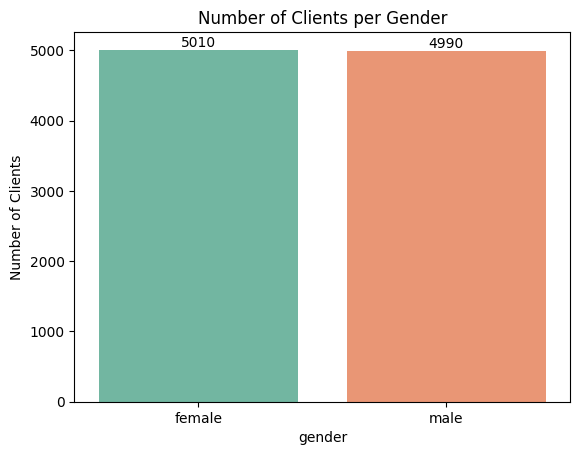

In [22]:
# check count for each category in the gender column
print(f'Count of customer for gender wise:\n {customer_data['gender'].value_counts()}\n')

# Create a countplot to visualize the count of each category in the gender column
ax=sns.countplot(hue='gender',data=customer_data,x='gender',stat='count',palette='Set2')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Number of Clients per Gender')
plt.ylabel('Number of Clients')
plt.show()

## Numberical data analysis for credit_score column

In [23]:
print(f'mean: {np.mean(customer_data['credit_score'])}')
print(f'max: {np.max(customer_data['credit_score'])}')
print(f'min: {np.min(customer_data['credit_score'])}')
print(f'standard deviation: {np.std(customer_data['credit_score'])}')

mean: 0.5152471698892113
max: 0.9608188278116948
min: 0.0533575454627435
standard deviation: 0.13462143272479846


In [24]:
# Summary statistics for the credit_score column
customer_data['credit_score'].describe()

count    10000.000000
mean         0.515247
std          0.134628
min          0.053358
25%          0.421301
50%          0.523659
75%          0.613827
max          0.960819
Name: credit_score, dtype: float64

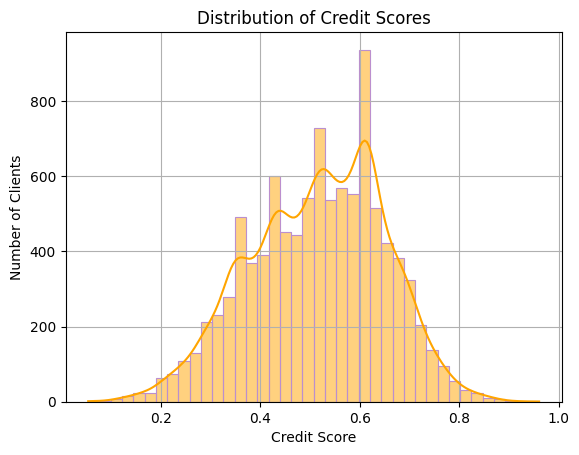

In [25]:
plt.Figure(figsize=(8,5))
sns.histplot(data=customer_data,x='credit_score',bins=40,color='orange',edgecolor='#BB8FCE', kde=True).set(title='Distribution of Credit Scores',
                                                                                                           xlabel='Credit Score',ylabel='Number of Clients')

plt.grid(True)
plt.show()

[Text(0.5, 1.0, 'Claim Probability by Income'),
 Text(0, 0.5, 'Claim Probability'),
 Text(0.5, 0, 'Income')]

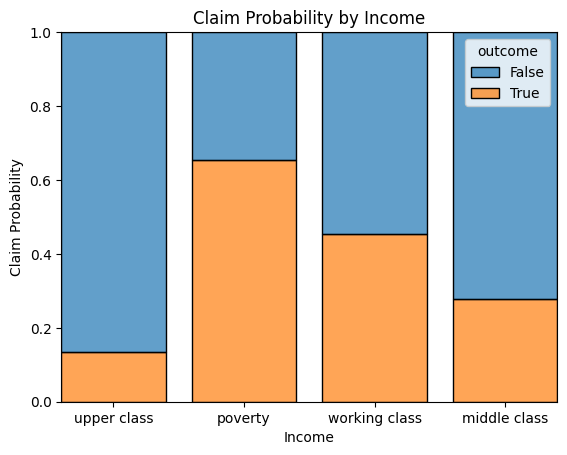

In [26]:
# Numeric-categorical analysis to show relationship between income class of clients and claim probability, based-on outcome data

ax=sns.histplot(customer_data, x='income', hue='outcome',stat='probability', multiple='fill', shrink=.8,alpha=0.7)
ax.set(title='Claim Probability by Income',ylabel='Claim Probability',xlabel='Income')

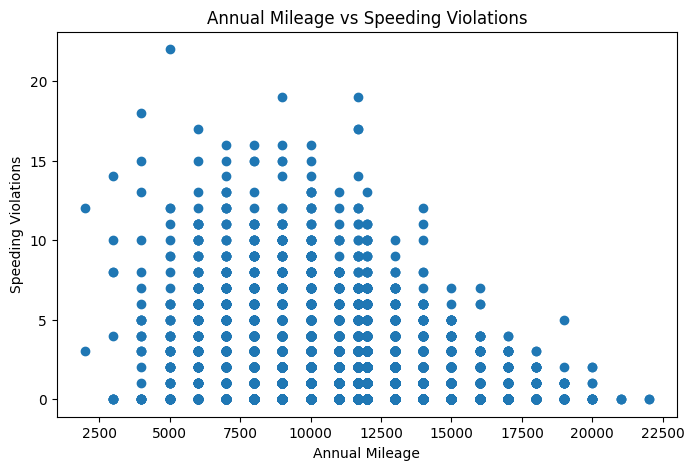

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: claim_rate, Length: 10000, dtype: int64
income       middle class   poverty  upper class  working class
education                                                      
high school      0.255396  0.671662     0.118347       0.450736
none             0.209790  0.640895     0.098592       0.394841
university       0.335135  0.649485     0.143167       0.550769


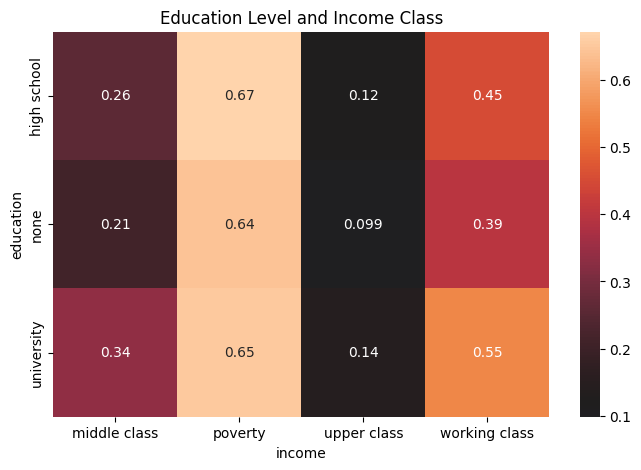

In [34]:
# Numeric-numeric analysis to show relationship between annual_mileage and speeding_violations

plt.figure(figsize=[8,5])
plt.scatter(data=customer_data,x='annual_mileage',y='speeding_violations')
plt.title('Annual Mileage vs Speeding Violations')
plt.ylabel('Speeding Violations')
plt.xlabel('Annual Mileage')
plt.show()

customer_data['claim_rate'] = np.where(customer_data['outcome']==True,1,0)
print(customer_data['claim_rate'])
edu_income = pd.pivot_table(data=customer_data, index='education',columns='income',values='claim_rate',aggfunc='mean')
print(edu_income)
plt.figure(figsize=(8,5))
sns.heatmap(edu_income,annot=True,center=0.117)
plt.title('Education Level and Income Class')
plt.show()


## EDA INSIGHT

C:\Users\71487\AppData\Local\Temp\ipykernel_30632\3645081924.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_mileage_acc = pd.pivot_table(data=customer_data,


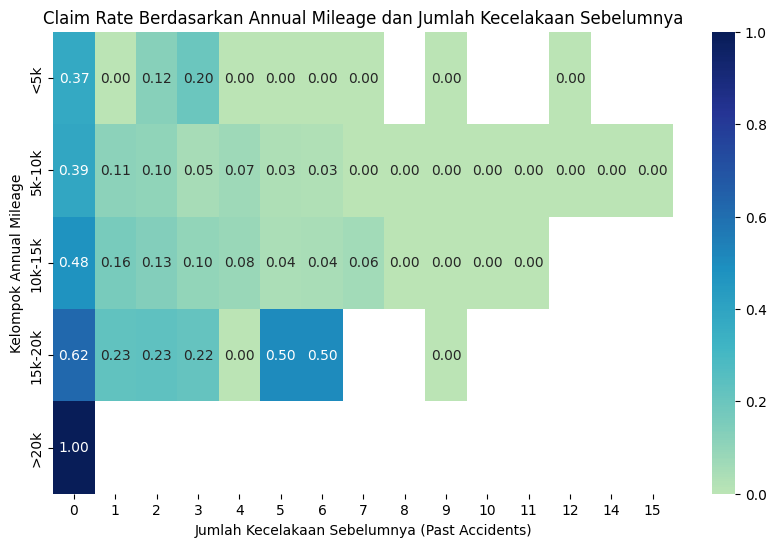

In [65]:
bins = [0, 5000, 10000, 15000, 20000, customer_data['annual_mileage'].max()]
labels = ['<5k', '5k-10k', '10k-15k', '15k-20k', '>20k']
customer_data['mileage_group'] = pd.cut(customer_data['annual_mileage'], bins=bins, labels=labels)

# Buat pivot table: Index = mileage group, Kolom = past accidents, Value = mean claim_rate
pivot_mileage_acc = pd.pivot_table(data=customer_data,
                                   index='mileage_group',
                                   columns='past_accidents',
                                   values='claim_rate',
                                   aggfunc='mean')

# Visualisasi heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_mileage_acc, annot=True, fmt=".2f", cmap="YlGnBu", center=customer_data['claim_rate'].mean())
plt.title('Claim Rate Berdasarkan Annual Mileage dan Jumlah Kecelakaan Sebelumnya')
plt.xlabel('Jumlah Kecelakaan Sebelumnya (Past Accidents)')
plt.ylabel('Kelompok Annual Mileage')
plt.show()

C:\Users\71487\AppData\Local\Temp\ipykernel_30632\1972844593.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_mileage_acc_grouped = pd.pivot_table(data=customer_data,


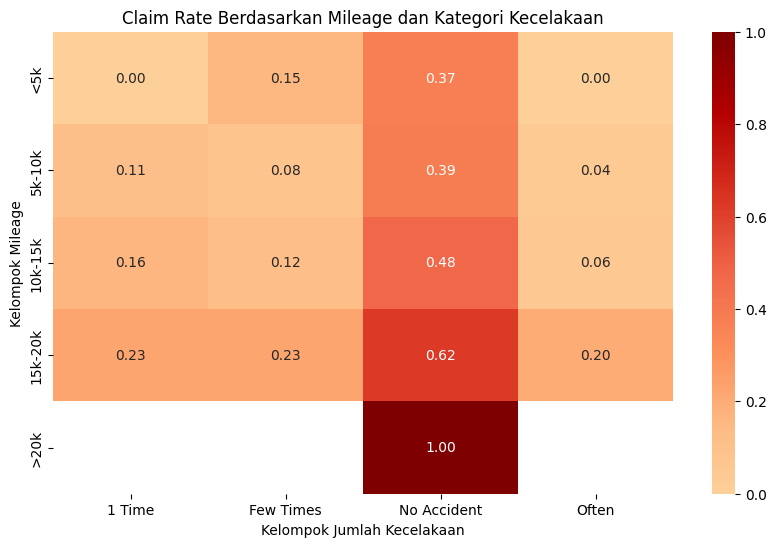

In [66]:
# Binning jumlah kecelakaan jadi kategori
def accident_group(x):
    if x == 0:
        return 'No Accident'
    elif x == 1:
        return '1 Time'
    elif 2 <= x <= 3:
        return 'Few Times'
    else:
        return 'Often'

customer_data['accident_group'] = customer_data['past_accidents'].apply(accident_group)

# Buat pivot table: Index = mileage group, Column = accident group, Values = claim_rate
pivot_mileage_acc_grouped = pd.pivot_table(data=customer_data,
                                           index='mileage_group',
                                           columns='accident_group',
                                           values='claim_rate',
                                           aggfunc='mean')

# Visualisasi heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_mileage_acc_grouped, annot=True, fmt=".2f", cmap="OrRd", center=customer_data['claim_rate'].mean())
plt.title('Claim Rate Berdasarkan Mileage dan Kategori Kecelakaan')
plt.xlabel('Kelompok Jumlah Kecelakaan')
plt.ylabel('Kelompok Mileage')
plt.show()

In [67]:
claimed = customer_data[customer_data['claim_rate'] == 1]
pd.crosstab(claimed['mileage_group'], claimed['accident_group'])

accident_group,1 Time,Few Times,No Accident,Often
mileage_group,,,,
<5k,0,4,19,0
5k-10k,62,50,546,16
10k-15k,176,126,1678,26
15k-20k,30,18,375,2
>20k,0,0,5,0


C:\Users\71487\AppData\Local\Temp\ipykernel_30632\1559561289.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


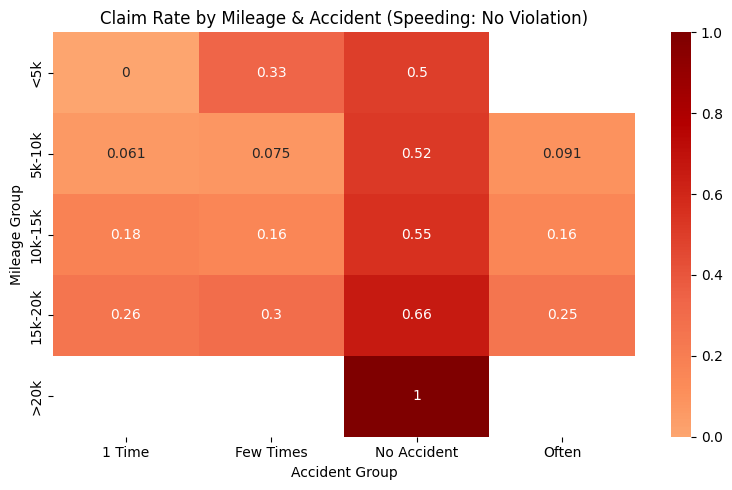

C:\Users\71487\AppData\Local\Temp\ipykernel_30632\1559561289.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


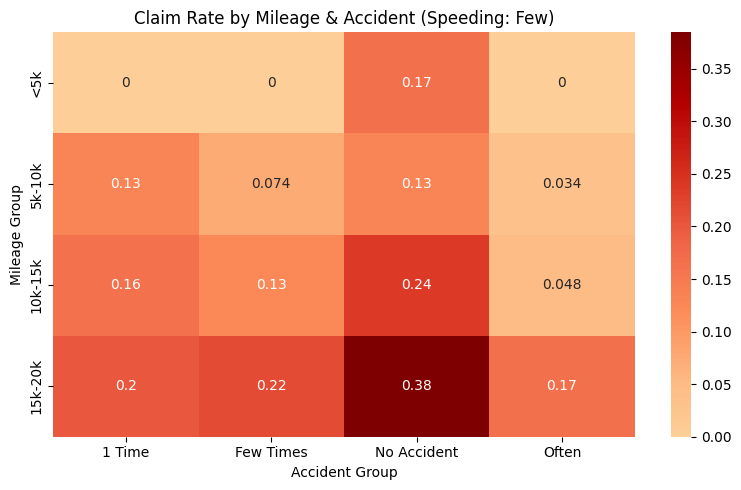

C:\Users\71487\AppData\Local\Temp\ipykernel_30632\1559561289.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


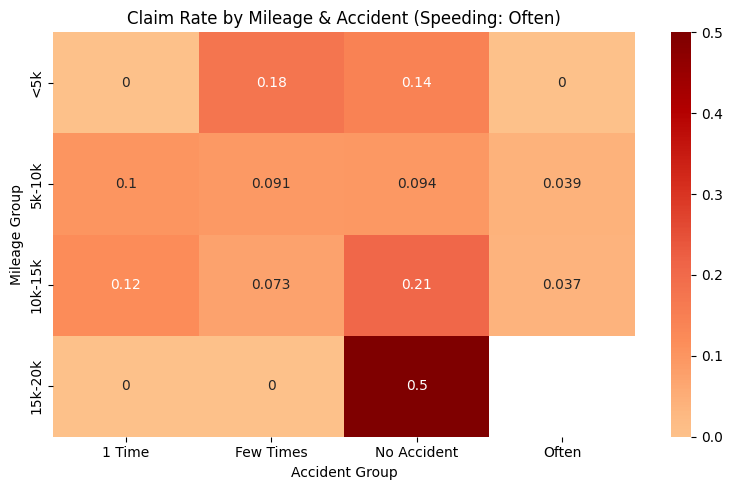

In [68]:
def categorize_speeding(val):
    if val == 0:
        return 'No Violation'
    elif 1 <= val <= 3:
        return 'Few'
    else:
        return 'Often'

# Apply ke DataFrame
customer_data['speeding_group'] = customer_data['speeding_violations'].apply(categorize_speeding)

for group in customer_data['speeding_group'].unique():
    subset = customer_data[customer_data['speeding_group'] == group]

    pivot = pd.pivot_table(
        data=subset,
        index='mileage_group',
        columns='accident_group',
        values='claim_rate',
        aggfunc='mean'
    )

    plt.figure(figsize=(8, 5))
    sns.heatmap(pivot, annot=True, cmap='OrRd', center=0.117)
    plt.title(f'Claim Rate by Mileage & Accident (Speeding: {group})')
    plt.xlabel('Accident Group')
    plt.ylabel('Mileage Group')
    plt.tight_layout()
    plt.show()

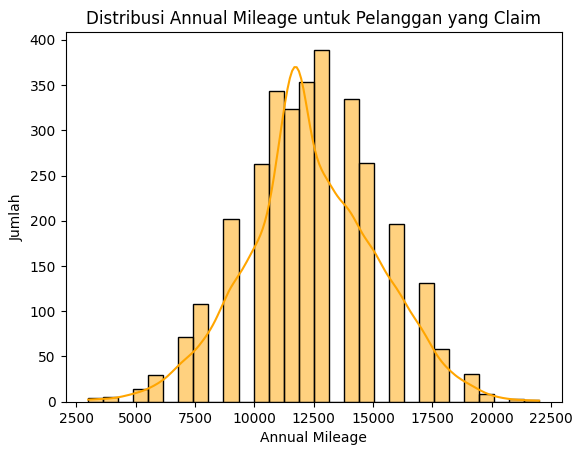

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Buat countplot
sns.histplot(data=claimed, x='annual_mileage', bins=30, kde=True, color='orange')
plt.title('Distribusi Annual Mileage untuk Pelanggan yang Claim')
plt.xlabel('Annual Mileage')
plt.ylabel('Jumlah')
plt.show()

In [69]:

# Crosstab untuk masing-masing speeding_group
for group in claimed['speeding_group'].unique():
    print(f"\nSpeeding Group: {group}")
    
    subset = claimed[claimed['speeding_group'] == group]
    
    ct = pd.crosstab(subset['mileage_group'], subset['accident_group'])
    
    print(ct)


Speeding Group: No Violation
accident_group  1 Time  Few Times  No Accident  Often
mileage_group                                        
<5k                  0          1           16      0
5k-10k               5          4          490      2
10k-15k             57         35         1482      8
15k-20k             19          8          339      1
>20k                 0          0            5      0

Speeding Group: Few
accident_group  1 Time  Few Times  No Accident  Often
mileage_group                                        
<5k                  0          0            2      0
5k-10k              39         23           44      6
10k-15k            103         76          170     12
15k-20k             11         10           35      1

Speeding Group: Often
accident_group  1 Time  Few Times  No Accident  Often
mileage_group                                        
<5k                  0          3            1      0
5k-10k              18         23           12      8
10k-15k 

In [70]:
filtered1 = claimed[
    (claimed['speeding_violations'] == 0) &
    (claimed['past_accidents'] == 0) &
    (claimed['mileage_group'].isin(['10k-15k']))
]
# print(filtered)
# Hitung jumlah per kelompok umur
age_counts = filtered1['age'].value_counts().sort_index()

# Tampilkan
print("Distribusi umur (age) untuk No Violation + No Accident:")
print(age_counts)

filtered2 = claimed[
    (claimed['speeding_violations'] == 0) &
    (claimed['past_accidents'] == 0) &
    (claimed['mileage_group'].isin(['>20k']))
]
# print(filtered)
# Hitung jumlah per kelompok umur
age_counts = filtered2['age'].value_counts().sort_index()

# Tampilkan
print("Distribusi umur (age) untuk No Violation + No Accident:")
print(age_counts)

Distribusi umur (age) untuk No Violation + No Accident:
age
16-25    974
26-39    289
40-64    160
65+       59
Name: count, dtype: int64
Distribusi umur (age) untuk No Violation + No Accident:
age
16-25    3
26-39    1
40-64    1
Name: count, dtype: int64


In [71]:
print('Claim Rate untuk No Violation, No Accident, untuk annual_mileage 10k-15k')
pivot = pd.pivot_table(filtered1, 
                       index='age', 
                       columns='driving_experience', 
                       values='claim_rate',  # atau kolom apa pun, asalkan count saja
                       aggfunc='count', 
                       fill_value=0)

# Tampilkan
print(pivot)
#No Violation, No Accident, 10k-15k, 0-9y,16-25

Claim Rate untuk No Violation, No Accident, untuk annual_mileage 10k-15k
driving_experience  0-9y  10-19y  20-29y  30y+
age                                           
16-25                974       0       0     0
26-39                242      47       0     0
40-64                143      15       2     0
65+                   56       1       1     1


In [72]:
filtered1 = claimed[
    (claimed['speeding_group'] == 'Few') &
    (claimed['past_accidents'] == 0) &
    (claimed['mileage_group'].isin(['10k-15k']))
]
# print(filtered)
# Hitung jumlah per kelompok umur
age_counts = filtered1['age'].value_counts().sort_index()

# Tampilkan
print("Distribusi umur untuk Few Violation + No Accident:")
print(age_counts)

Distribusi umur untuk Few Violation + No Accident:
age
26-39    131
40-64     24
65+       15
Name: count, dtype: int64


In [73]:
pivot = pd.pivot_table(filtered1, 
                       index='age', 
                       columns='driving_experience', 
                       values='claim_rate',  # atau kolom apa pun, asalkan count saja
                       aggfunc='count', 
                       fill_value=0)

# Tampilkan
print(pivot)

driving_experience  10-19y  20-29y  30y+
age                                     
26-39                  131       0     0
40-64                   14      10     0
65+                     10       1     4


In [74]:
filtered1 = claimed[
    (claimed['speeding_group'] == 'Often') &
    (claimed['past_accidents'] == 0) &
    (claimed['mileage_group'].isin(['10k-15k']))
]
# print(filtered)
# Hitung jumlah per kelompok umur
age_counts = filtered1['age'].value_counts().sort_index()

# Tampilkan
print("Distribusi umur untuk Often Violation + No Accident:")
print(age_counts)


Distribusi umur untuk Often Violation + No Accident:
age
26-39    17
40-64     6
65+       3
Name: count, dtype: int64


In [75]:
pivot = pd.pivot_table(filtered1, 
                       index='age', 
                       columns='driving_experience', 
                       values='claim_rate',  # atau kolom apa pun, asalkan count saja
                       aggfunc='count', 
                       fill_value=0)

# Tampilkan
print(pivot)

driving_experience  10-19y  20-29y
age                               
26-39                   17       0
40-64                    4       2
65+                      1       2


In [83]:
filtered1 = claimed[
    (claimed['mileage_group'].isin(['10k-15k']))
]
pivot = pd.pivot_table(filtered1, 
                       index='age', 
                       columns='income', 
                       values='claim_rate',  # atau kolom apa pun, asalkan count saja
                       aggfunc='count', 
                       fill_value=0)

# Tampilkan
print(pivot)

income  middle class  poverty  upper class  working class
age                                                      
16-25            131      559           25            259
26-39            173      189           91            211
40-64             63       19          125             55
65+               12        2           87              5


# Warning
### Age : 16-25, 26-39
### Past Accident : 0/No Accident
### Speeding Violation : No Violation, Few, Often
### Driving Experience : 0-9y, 10-19y
### Annual Mileage : 10k-15k
### Income : Poverty

outcome
True     559
False    150
Name: count, dtype: int64


C:\Users\71487\AppData\Local\Temp\ipykernel_30632\1188229342.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered1, x='outcome', palette='Set2')


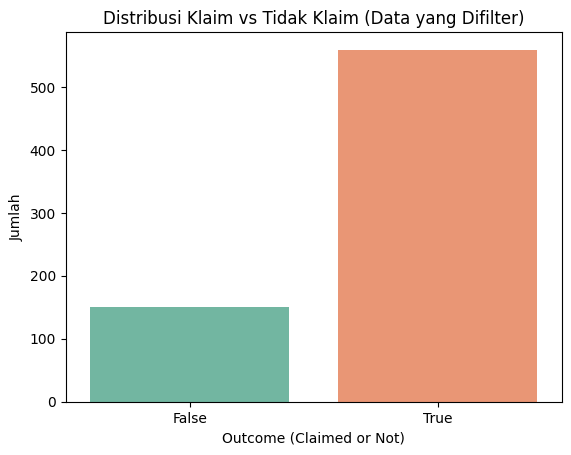

Jumlah orang yang klaim dengan keadaan tersebut: 73.2%
Jumlah orang yang tidak klaim dengan keadaan tersebut: 26.8%


In [91]:
filtered1 = customer_data[
    (customer_data['age'].isin(['16-25','26,39'])) &
    (customer_data['past_accidents'] == 0) &
    (customer_data['mileage_group'].isin(['10k-15k'])) &
    (customer_data['driving_experience'].isin(['0-9y','10-19y'])) &
    (customer_data['income'] == 'poverty')
]
print(filtered1['outcome'].value_counts())

# Atau versi visual:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=filtered1, x='outcome', palette='Set2')
plt.title('Distribusi Klaim vs Tidak Klaim (Data yang Difilter)')
plt.xlabel('Outcome (Claimed or Not)')
plt.ylabel('Jumlah')
plt.show()

claim_rate_true = 0.732
no_claim_rate = 0.268
print(f'Jumlah orang yang klaim dengan keadaan tersebut: {claim_rate_true:.1%}')
print(f'Jumlah orang yang tidak klaim dengan keadaan tersebut: {no_claim_rate:.1%}')